C:\Users\amine\Snitchan\trello_scrape.ipynb:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
  "\t#https://developer.atlassian.com/cloud/trello/rest/api-group-search/\n",


Enter search term: Randy
Generating user token for you...
You will be directed to a page where you will be given a token (64 characters), which you have to paste here.
Enter the token (64 characters): 
b7e69152b47c9894017d5e62b0293cc323d1f650012397e9cfd9df427ca5da5c
Searching Trello...
Searching Gmail...
Searching Google drive...
Searching Confluence...
https://orthogonal.atlassian.net/wiki/rest/api/content/search?cql=text+~+%27Randy%27++&limit=100
Done searching!
printing Analytics Results...
         Date          tool  Count
0  2022-03-19        Trello      3
1  2022-03-19         gmail      1
2  2022-04-01  Google Drive      6
3  2022-04-01         gmail      1
4  2022-04-12         gmail      3
5  2022-04-13         gmail      7
6  2022-04-14         gmail      1
7  2022-04-17         gmail      3
8  2022-04-18  Google Drive      4
9  2022-04-18        Trello      2
10 2022-04-18         gmail      2
11 2022-04-19         gmail      3
                        from                  

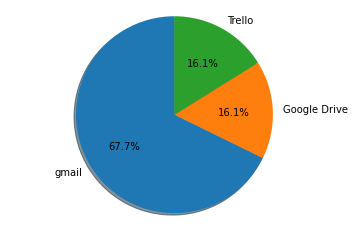

<Figure size 1440x1440 with 0 Axes>

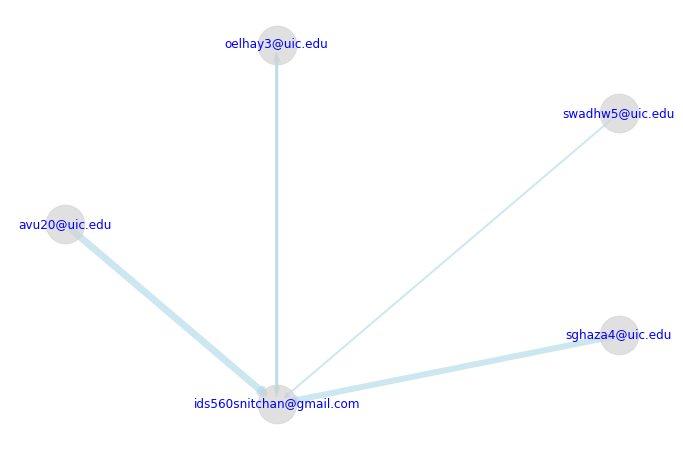

In [1]:
#!/usr/local/bin/python3
from ipynb.fs.full.file_setup import file_setup
from ipynb.fs.full.google_drive_scrape import google_drive_scrape
from ipynb.fs.full.confluence_scrape import confluence_scrape
from ipynb.fs.full.gmail_scrape import gmail_scrape
#from slack_scrape import slack_scrape
from ipynb.fs.full.trello_scrape import trello_scrape
#from zoho_scrape import zoho_scrape
import ipynb.fs.full.config as cfg
import webbrowser
from ipynb.fs.full.analytics_setup import analytics_setup
from ipynb.fs.full.snitchan_analytics import snitchan_analytics

if __name__ == '__main__':

	search_term = input("Enter search term: ")

	file_setup.setup(search_term)
	analytics_setup.a_setup(search_term)

	#Running first because user token may/may not be generated
	Trello = trello_scrape(search_term)
	print("Searching Trello...")
	cards = Trello.search(search_term)

	Gmail = gmail_scrape()
	print("Searching Gmail...")
	gmail_result = Gmail.search(search_term)

	Google_Drive = google_drive_scrape()
	print("Searching Google drive...")
	gd_results = Google_Drive.search(search_term)

	Confluence = confluence_scrape()
	print("Searching Confluence...")
	Confluence.search(search_term)


    

	#Zoho = zoho_scrape()
	#print("Searching Zoho...")
	#Zoho.search(search_term)

	file_setup.end_file()

	print("Done searching!")
	file_path = "file://"+str(cfg.project['path'])+"/search results.html"
	file_path.encode(encoding='UTF-8',errors='strict')
	webbrowser.open(file_path)
    
	analytics = snitchan_analytics()
	print("printing Analytics Results...")
	analytics.analysis(search_term,gmail_results= gmail_result, gd_results = gd_results, cards = cards)
	analytics_setup.a_end_file() 
    
	a_file_path = "file://"+str(cfg.project['path'])+"/analytics results.html"
	a_file_path.encode(encoding='UTF-8',errors='strict')
	webbrowser.open(a_file_path)